# Look into ndpyramid

In [49]:
import xarray as xr
from distributed import Client, LocalCluster
import rioxarray
from ndpyramid import pyramid_coarsen, pyramid_reproject
import matplotlib.pyplot as plt

In [2]:
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63230,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:63250,Total threads: 3
Dashboard: http://127.0.0.1:63251/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:63236,


## Load the gfs wave dataset

In [51]:
ds = xr.open_dataset("s3://ioos-code-sprint-2022/gfs-wave.zarr",
                     engine='zarr',
                     storage_options={"anon":True})

## Coarsen the dataset, and access via ndpyramid

In [52]:
# make a coarsened pyramid
pyramid = pyramid_coarsen(ds, factors=[16, 8, 4, 3, 2, 1], dims=['latitude', 'longitude'], boundary='trim')

# make a reprojected (EPSG:4326) pyramid
ds = ds.rio.write_crs('EPSG:4326')
#pyramid = pyramid_reproject(ds, levels=2)

# write the pyramid to zarr
pyramid.to_zarr('gfs-wave-resampled')

## Visualize the Pyramid

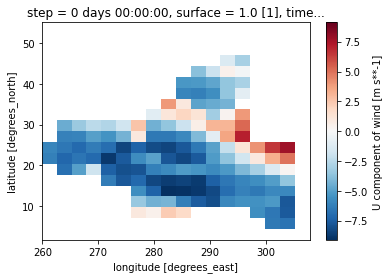

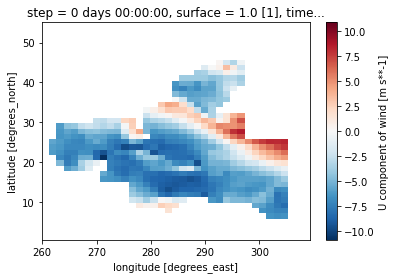

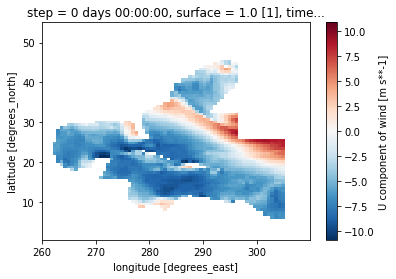

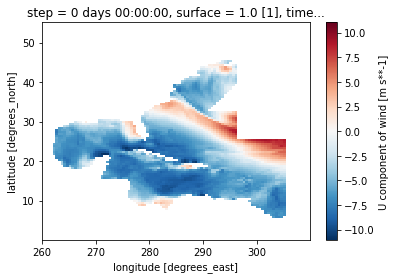

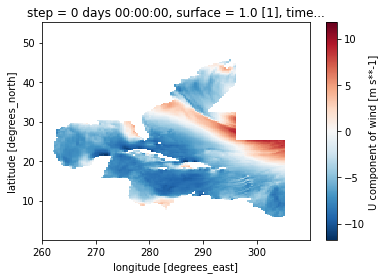

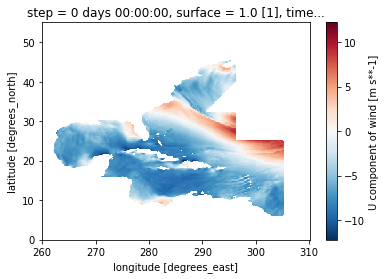

In [56]:
for child in pyramid.children:
    child.ds.u.isel(time=0).plot()
    plt.show()
    plt.close()